## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

In [1]:
## 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [2]:
titanic_df = pd.read_csv('./train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fare $\leftrightarrow$ Survived  
  
- 가설: 티켓 가격이 비쌀수록 많이 살아남았을 것이다?  
  
  
  
- 예상:
    - 좌석 등급이 높을수록 많이 살아남았다. -> 확인됨
    - 좌석 등급이 높을수록 티켓 가격이 비쌀 것이다. -> **확인필요**
    - 따라서, 티켓 가격이 비쌀수록 많이 살아남았을 것이다. -> **가설, 확인필요**

### 좌석등급이 높을수록 티켓 가격이 비쌀것이다?

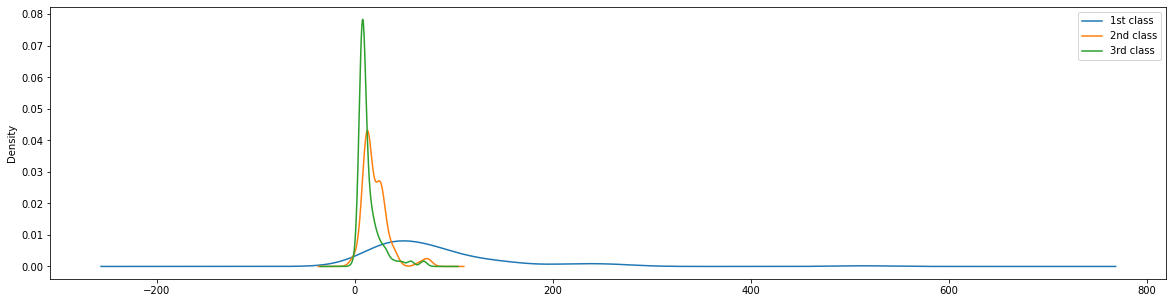

In [3]:
## Fare graph with Pclass
plt.figure(figsize=(20, 5))
titanic_df['Fare'][titanic_df.Pclass == 1].plot(kind='kde')
titanic_df['Fare'][titanic_df.Pclass == 2].plot(kind='kde')
titanic_df['Fare'][titanic_df.Pclass == 3].plot(kind='kde')

plt.legend(['1st class', '2nd class', '3rd class'])
plt.show()

좌석등급이 높을수록 그래프의 고점이 오른쪽으로 이동함을 확인할 수 있음  
$\rightarrow$ 좌석등급이 높을수록 티켓 가격이 비쌈!

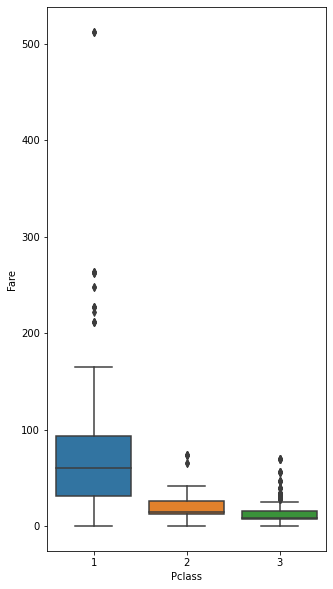

In [4]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="Pclass", y="Fare", data=titanic_df)
plt.show()

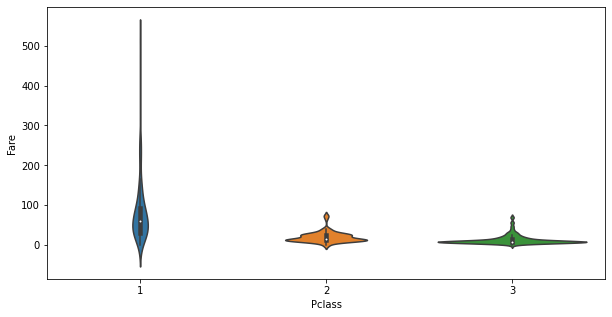

In [7]:
plt.figure(figsize=(10, 5))
sns.violinplot(x="Pclass", y="Fare", data=titanic_df)
plt.show()

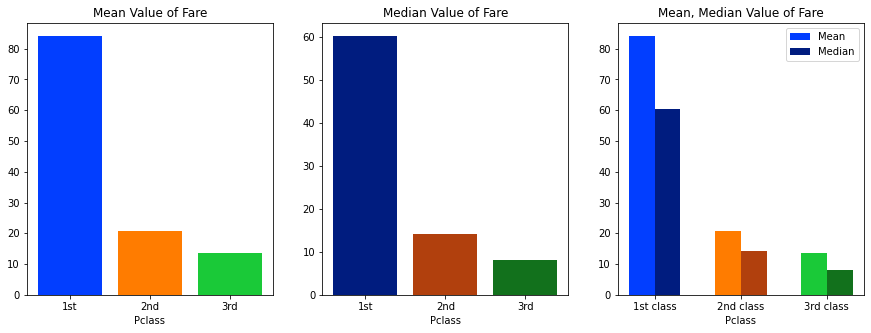

In [8]:
# 등급별 티켓 가격의 평균, 중앙값 확인
fare_mean = titanic_df[['Pclass','Fare']].groupby(['Pclass'], as_index=False).mean()
fare_median = titanic_df[['Pclass','Fare']].groupby(['Pclass'], as_index=False).median()
fare_df = pd.DataFrame({'Pclass':fare_mean['Pclass'], 'mean':fare_mean['Fare'], 'median':fare_median['Fare']})

plt.figure(figsize=(15, 5))
colors = sns.color_palette('bright', 3)
plt.subplot(1, 3, 1)
plt.title('Mean Value of Fare')
plt.bar(fare_df['Pclass'], fare_df['mean'], color=colors)
plt.xticks([1, 2, 3], ['1st', '2nd', '3rd'])
plt.xlabel('Pclass')

colors = sns.color_palette('dark', 3)
plt.subplot(1, 3, 2)
plt.title('Median Value of Fare')
plt.bar(fare_df['Pclass'], fare_df['median'], color=colors)
plt.xticks([1, 2, 3], ['1st', '2nd', '3rd'])
plt.xlabel('Pclass')

plt.subplot(1, 3, 3)
plt.title('Mean, Median Value of Fare')
colors = sns.color_palette('bright', 3)
plt.bar(fare_df['Pclass']-0.15, fare_df['mean'], color=colors, width=0.3)
colors = sns.color_palette('dark', 3)
plt.bar(fare_df['Pclass']+0.15, fare_df['median'], color=colors, width=0.3)
plt.xticks([1, 2, 3], ['1st class', '2nd class', '3rd class'])
plt.legend(['Mean', 'Median'])
plt.xlabel('Pclass')
plt.show()

### 티켓가격이 비쌀수록 많이 살아남았을 것이다?

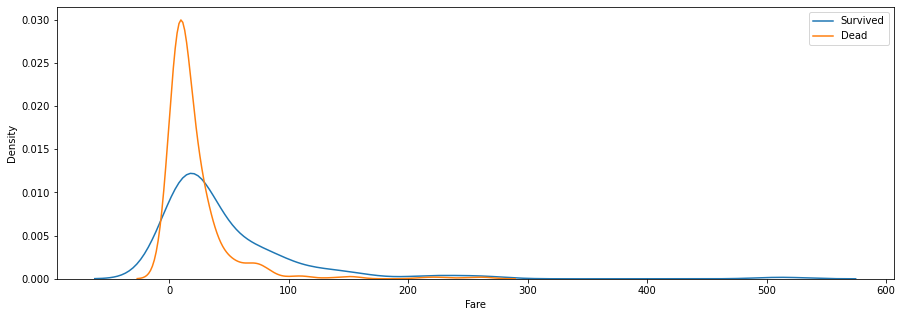

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.kdeplot(x=titanic_df[titanic_df.Survived == 1]['Fare'], ax=ax)
sns.kdeplot(x=titanic_df[titanic_df.Survived == 0]['Fare'], ax=ax)
plt.legend(['Survived', 'Dead'])
plt.show()

살아남은 사람의 티켓가격이 더 비쌌음을 확인할 수 있음  
- 하지만 같은 등급끼리도 가격 편차가 심하게 나는 편임
- 이러한 이유로, 좌석등급보다는 티켓 가격이 생존과 약한 상관관계를 가지고 있다고 판단됨
    - 영향이 있지만 직접적이진 않다

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

# Dataset : E-Commerce Shipping Data

## 0. 라이브러리, 데이터셋 준비

In [10]:
## 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

ship_df = pd.read_csv('./shipping.csv')

## 1. 분석의 목적과 변수 확인

- 제 시간에 배송이 완료된 상품들은 어떤 상품들일까?

In [11]:
# 상위 5개 데이터 확인
ship_df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [12]:
# 각 Column의 datatype 확인
ship_df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [13]:
# Reached.on.Time_Y.N column 이름 변경
ship_df.rename(columns={'Reached.on.Time_Y.N':'Delayed'}, inplace=True)

## 1-2. Dataset Description
각 column별 데이터 설명
- **ID** - 주문한 고객 ID          
- **Warehouse block**  - 상품이 어느 창고에 있었는지, (A, B, C, D, E)          
- **Mode of shipment**  - 운송 방식(Ship, Flight, Road)          
- **Customer care calls**   - 배송 조회 문의 전화 건수          
- **Customer rating**   - 고객 평가(1:최악, 5:최고)          
- **Cost of the product**   - 상품 가격          
- **Prior purchases**   - 이전에 구매한 횟수            
- **Product importance**   - 상품 중요도 (low, medium, high)          
- **Gender**   - 고객 성별(Male, Female)          
- **Discount offered**    - 할인 적용          
- **Weight in gms**    - 상품 무게(단위: gram)          
- **Delayed**        - 제 때에 도착했는지 여부(1:늦음, 0:제 때에 도착함)
    - 원래 column명: Reached.on.Time_Y.N

## 2. 데이터 전체적으로 살펴보기

In [14]:
# 데이터 요약 확인
ship_df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Delayed
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [15]:
# 상관계수 확인
ship_df.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Delayed
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Delayed,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


In [16]:
# 결측치 확인
ship_df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Delayed                0
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### I. Mode of Shipment $\leftrightarrow$ Delayed

In [17]:
# 운송 방식 종류 파악
ship_df['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [18]:
# 운송 방식에 따른 상품 수 파악
ship_df[['Mode_of_Shipment', 'Delayed']].groupby(['Mode_of_Shipment']).count()

,Delayed
Mode_of_Shipment,
Flight,1777
Road,1760
Ship,7462


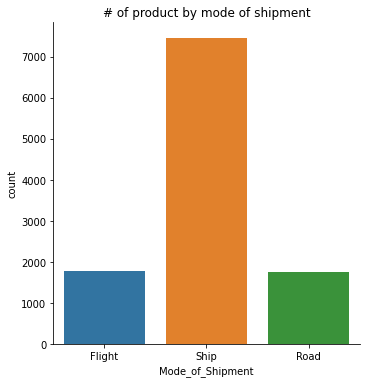

In [20]:
sns.catplot(x='Mode_of_Shipment', kind='count', data=ship_df)
plt.title('# of product by mode of shipment')
plt.show()

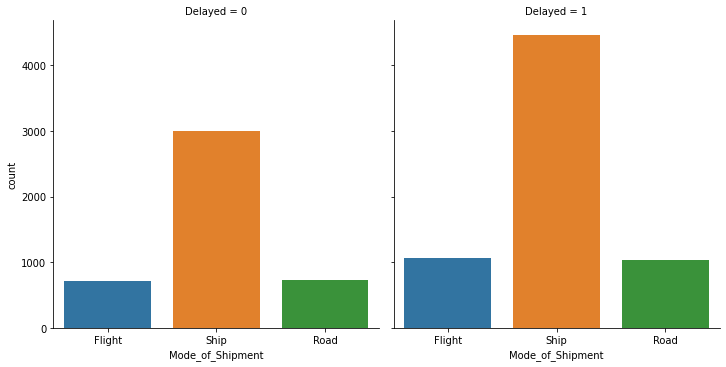

In [21]:
sns.catplot(x='Mode_of_Shipment', col='Delayed', kind='count', data=ship_df)
plt.show()

해상으로 운송된 상품의 수가 다른 운송방식에 비해 압도적으로 높음  
$\rightarrow$ 따라서, 비율로 비교를 해야 옳음

In [22]:
# 늦게 배송된 상품 비율
ship_df[['Mode_of_Shipment', 'Delayed']].groupby(['Mode_of_Shipment']).mean()

,Delayed
Mode_of_Shipment,
Flight,0.601576
Road,0.588068
Ship,0.597561


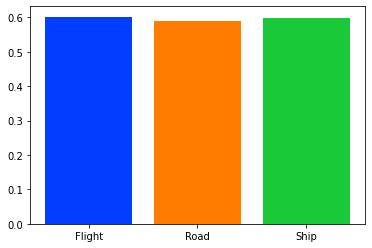

In [24]:
delay_rate_by_shipment = ship_df[['Mode_of_Shipment', 'Delayed']].groupby(['Mode_of_Shipment'], as_index=False).mean()
colors =sns.color_palette('bright', 3)
plt.bar(delay_rate_by_shipment['Mode_of_Shipment'], delay_rate_by_shipment['Delayed'], color=colors)
plt.show()

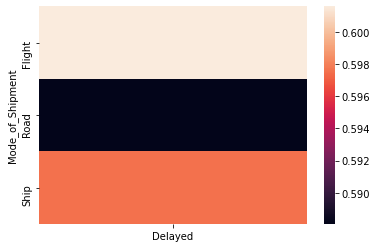

In [23]:
sns.heatmap(ship_df[['Mode_of_Shipment', 'Delayed']].groupby(['Mode_of_Shipment']).mean())
plt.show()

### 분석 결과  

육상으로 운송된 상품이 해상, 항공으로 운송된 상품보다는 제 때에 도착할 확률이 높긴 했으나 거의 차이가 없음  

예상으로는 육상 > 항공 > 해상 순으로 정시 배송될 것 같았으나, 실제로는 거의 차이가 없었다.


### II. Customer care calls $\leftrightarrow$ Delayed

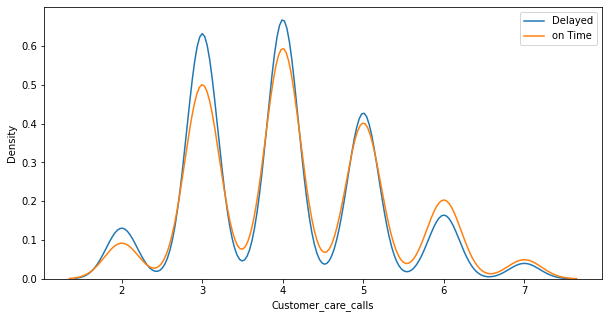

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=ship_df[ship_df['Delayed'] == 1]['Customer_care_calls'], ax=ax)
sns.kdeplot(x=ship_df[ship_df['Delayed'] == 0]['Customer_care_calls'], ax=ax)
plt.legend(['Delayed', 'on Time'])
plt.show()

배송 문의 전화 횟수 별 지연 확률

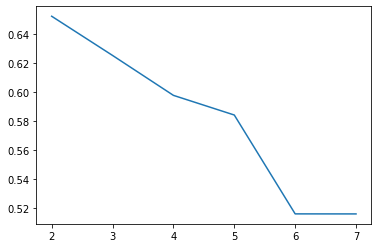

In [26]:
delay_rate_by_shipment = ship_df[['Customer_care_calls', 'Delayed']].groupby(['Customer_care_calls'], as_index=False).mean()
plt.plot(delay_rate_by_shipment['Customer_care_calls'], delay_rate_by_shipment['Delayed'])
plt.show()

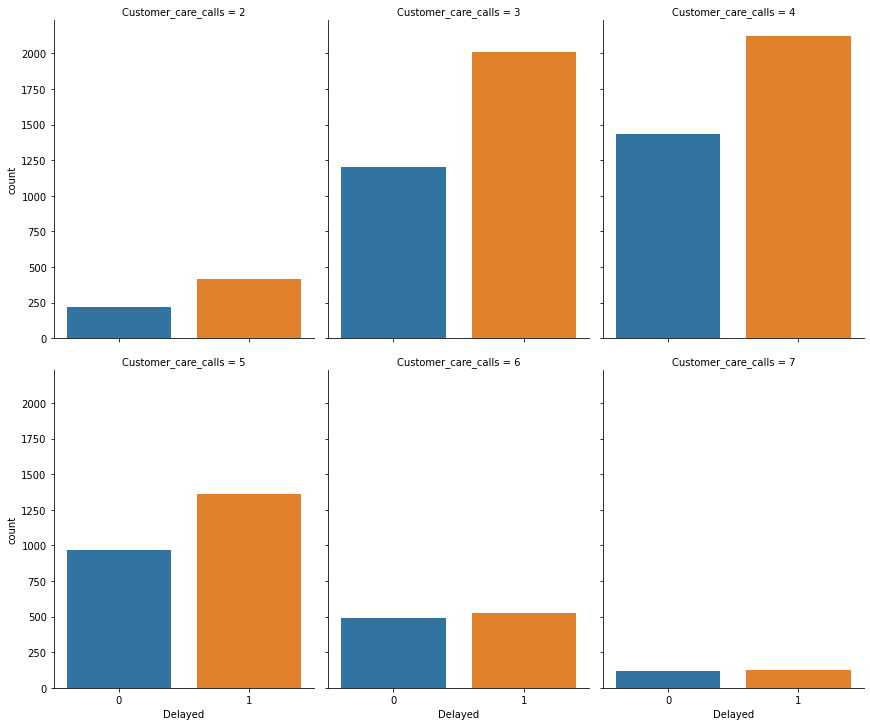

In [30]:
sns.catplot(x='Delayed', col='Customer_care_calls', col_wrap=3, kind='count', data=ship_df, height=5, aspect=.8)
plt.subplots_adjust(hspace=0.1)
plt.show()

### 분석 결과  

6번 이상 배송 문의 전화를 걸었을 경우, 정시에 배송되는 경우가 더 많았다.

배송 문의 전화를 많이 할수록 배송이 빨리 되었을것이라 예상했는데, 실제로 영향이 있었다.

### III. Customer rating $\leftrightarrow$ Delayed

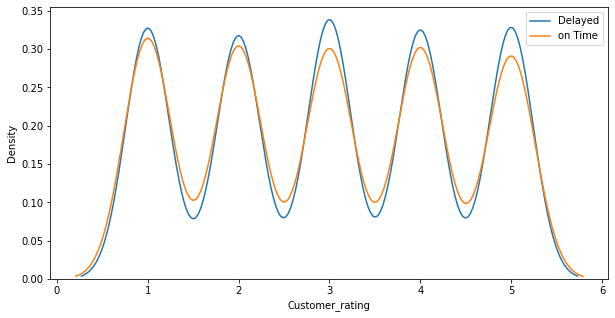

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=ship_df[ship_df['Delayed'] == 1]['Customer_rating'], ax=ax)
sns.kdeplot(x=ship_df[ship_df['Delayed'] == 0]['Customer_rating'], ax=ax)
plt.legend(['Delayed', 'on Time'])
plt.show()

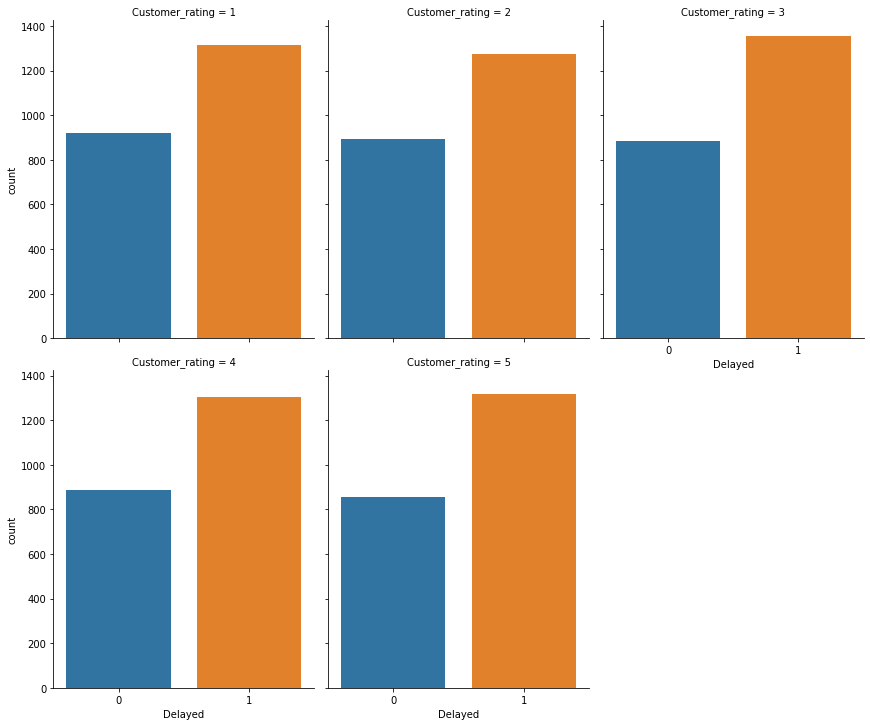

In [33]:
sns.catplot(x='Delayed', col='Customer_rating', col_wrap=3, kind='count', data=ship_df, height=5, aspect=.8)
plt.subplots_adjust(hspace=0.1)
plt.show()

### 분석 결과  

고객 평가와 정시 배송 여부는 상관관계가 거의 없었다.

배송이 늦게 되면 고객이 평가를 낮게 줬을 것이라 예상했는데, 그렇지 않았다.

### IV. Product importance $\leftrightarrow$ Delayed

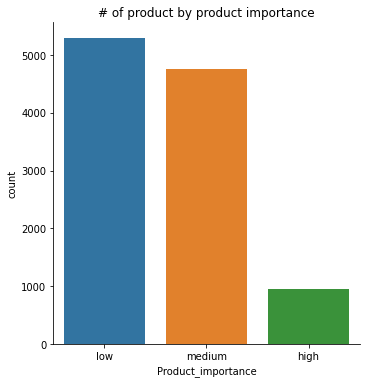

In [34]:
sns.catplot(x='Product_importance', kind='count', data=ship_df)
plt.title('# of product by product importance')
plt.show()

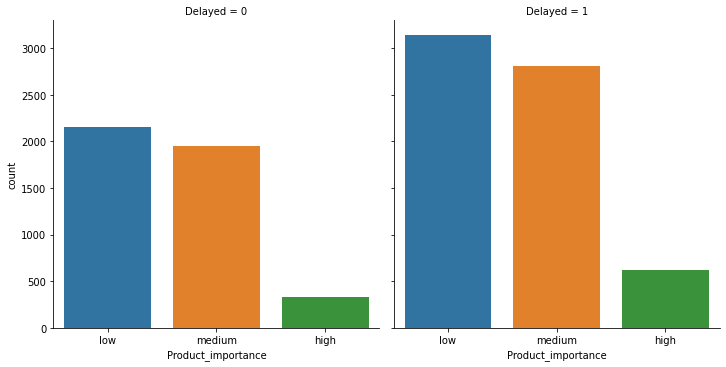

In [35]:
sns.catplot(x='Product_importance', col='Delayed', kind='count', data=ship_df)
plt.show()

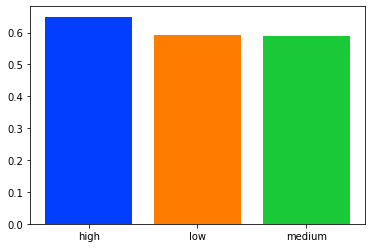

In [36]:
delay_rate_by_shipment = ship_df[['Product_importance', 'Delayed']].groupby(['Product_importance'], as_index=False).mean()
colors =sns.color_palette('bright', 3)
plt.bar(delay_rate_by_shipment['Product_importance'], delay_rate_by_shipment['Delayed'], color=colors)
plt.show()

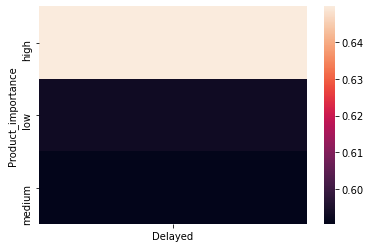

In [37]:
sns.heatmap(ship_df[['Product_importance', 'Delayed']].groupby(['Product_importance']).mean())
plt.show()

### 분석 결과  

중요도가 높은 상품은 배송이 지연될 확률이 좀 더 높았다.

중요도가 높은 상품은 배송이 늦게 되더라도 파손되지 않고 안전하게 배송되는 것에 우선순위를 두는 것 같다.  
따라서, 중요도가 높은 상품은 배송이 지연될 확률이 더 높은 것으로 확인되는 것 같다.

### V. Weight in gms $\leftrightarrow$ Delayed

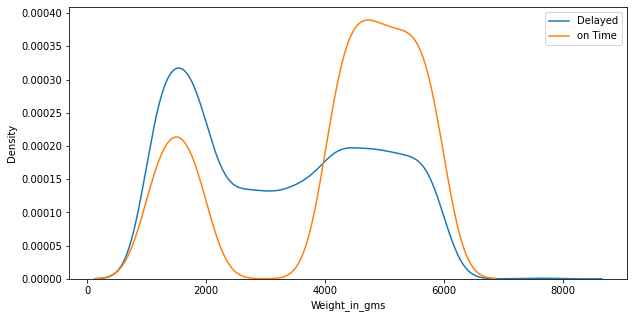

In [141]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(x=ship_df[ship_df['Delayed'] == 1]['Weight_in_gms'], ax=ax)
sns.kdeplot(x=ship_df[ship_df['Delayed'] == 0]['Weight_in_gms'], ax=ax)
plt.legend(['Delayed', 'on Time'])
plt.show()

### 분석 결과  

무거운 상품일수록 제 때에 배송될 확률이 높았다.

예상은 오히려 상품이 가벼울수록 빨리 도착할 것이라 생각했는데 반대였다. 왜인지는 잘 모르겠다...ㅠㅠ